In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from   IPython.display import display, HTML
from collections import deque
import random
import os, pathlib, sys

In [2]:
pd.set_option('display.width', 1000)
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option('mode.chained_assignment', None)

In [3]:
parent_module_path = os.path.abspath(os.path.join('..'))
if parent_module_path not in sys.path:
    sys.path.append(parent_module_path)

In [4]:
import matplotlib.ticker as mtick
import matplotlib.dates as md
import matplotlib.gridspec as gridspec

tick    = mtick.StrMethodFormatter('\${x:,.0f}')
tick2    = mtick.StrMethodFormatter('\${x:,.2f}')
normal  = mtick.StrMethodFormatter('{x:,.0f}')
normal2 = mtick.StrMethodFormatter('{x:,.2f}')

colors = {'red': '#ff207c', 'grey': '#42535b', 'blue': '#207cff', 'orange': '#ffa320', 'green': '#00ec8b'}
config_ticks = {'size': 14, 'color': colors['grey'], 'labelcolor': colors['grey']}

# Load Data & construct features

In [5]:
from AOE.utils import get_LOB_data, get_LOB_features, verbose_print #get_features
from AOE.plots import rescale_plot


In [7]:
asset_name    = "MSFT"
trade_date    = '2022-06-30'
tick_size     = 0.001

try:
    LOB_features = pd.read_pickle(f'../data/Features/LOB_features_{trade_date}.pkl')
except Exception as e:
    LOB_data, LOB_messages     = get_LOB_data(f'../data/Market', asset_name, trade_date)
    LOB_features  = get_LOB_features(LOB_data,
                                 LOB_msg    = LOB_messages,
                                 trade_date = trade_date)
    LOB_features.to_pickle(f'../data/Features/LOB_features_{trade_date}.pkl')


In [9]:
# LOB_features

# Plot data

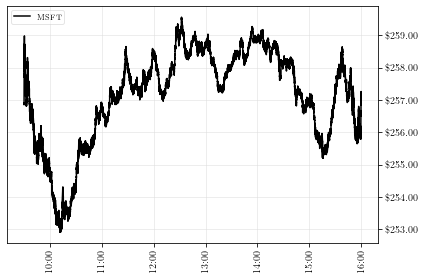

In [10]:
import matplotlib.dates as md
import matplotlib.gridspec as gridspec

rescale_plot(2.5)
fig, ax = plt.subplots(1, 1)

xfmt = md.DateFormatter('%H:%M')

ax.plot(LOB_features.timestamp, LOB_features['mid_price'], color='k')
ax.yaxis.set_major_formatter(tick2)
ax.xaxis.set_major_formatter(md.DateFormatter('%H:%M'))
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
ax.grid(axis='both', color='gainsboro', linestyle='-', linewidth=0.5)
ax.set_axisbelow(True)
ax.yaxis.set_label_position("left")
ax.legend(['MSFT'], fancybox=True, framealpha=0.5,loc="upper left")
ax.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.savefig('NUM1.pdf', bbox_inches='tight')
plt.show()

# plt.savefig('MSFT_LOB_data.pdf')


In [22]:
fwd_cols = []
fwd_col_l = (1, 5, 10, 20, 50, 40, 60, 100, 300, 500, 1000, 5000, 10000, 20000, 50000, 100000)
for w in fwd_col_l:
    fwd_cols += [f'fwd_price_move_{w}']


In [12]:
LOB_features.columns

Index(['bid_1', 'bid_volume_1', 'mid_price', 'ask_1', 'ask_volume_1', 'imbalance_1', 'imbalance_2', 'imbalance_3', 'timestamp', 'traded_volume', 'fwd_price_move_1', 'fwd_price_move_5', 'fwd_price_move_10', 'fwd_price_move_20', 'fwd_price_move_50', 'fwd_price_move_40', 'fwd_price_move_60', 'fwd_price_move_100', 'fwd_price_move_300', 'fwd_price_move_500', 'fwd_price_move_1000', 'fwd_price_move_5000', 'fwd_price_move_10000', 'fwd_price_move_20000', 'fwd_price_move_50000', 'fwd_price_move_100000', 'trend_1000', 'trend_10000', 'trend_50000', 'trend_100000', 'vol_1_1000', 'vol_10_10000', 'vol_50_50000', 'vol_100_100000', 'rsi_5_10000', 'rsi_25_50000', 'rsi_50_100000', 'traded_ask_qtties', 'traded_bid_qtties', 'traded_qtties', 'ba_spread', 'ba_spread_1', 'ba_spread_2', 'ba_spread_3', 'ba_spread_4'], dtype='object')

In [16]:
# avgs

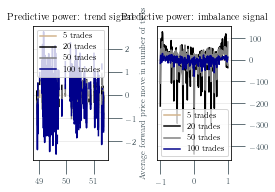

In [18]:
# plt.rcParams['figure.figsize'] = (15., 13. / 16 * 12)
rescale_plot(3.5)
fig = plt.figure()
gs = gridspec.GridSpec(nrows=1, ncols=2)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

predictive_feature = 'rsi_50_100000'
counts = (LOB_features[[predictive_feature] + fwd_cols].round(3).groupby(predictive_feature).count().iloc[1:-1])
avgs   = (LOB_features[[predictive_feature] + fwd_cols].round(3).groupby(predictive_feature).mean().iloc[1:-1]/tick_size)

avgs[counts<500]=np.nan
ax1.plot(avgs.iloc[:,0], color='tan')
ax1.plot(avgs.iloc[:,1], color='k')
ax1.plot(avgs.iloc[:,2], color='grey')
ax1.plot(avgs.iloc[:,3], color='darkblue')

predictive_feature = 'imbalance_1'
counts = (LOB_features[[predictive_feature] + fwd_cols].round(2).groupby(predictive_feature).count())
avgs = (LOB_features[[predictive_feature] + fwd_cols].round(2).groupby(predictive_feature).mean()/tick_size)
avgs[counts<500]=np.nan
ax2.plot(avgs.iloc[:,0], color='tan')
ax2.plot(avgs.iloc[:,-1], color='k')
ax2.plot(avgs.iloc[:,-2], color='grey')
ax2.plot(avgs.iloc[:,-3], color='darkblue')

# ax1.set_xlim(-0.5, 0.5)

for ax in (ax1,ax2):
    ax.yaxis.tick_right()
    ax.tick_params(axis='both', **config_ticks)
    ax.yaxis.set_label_position("right")
    ax.yaxis.label.set_color(colors['grey'])
    ax.grid(axis='y', color='gainsboro', linestyle='-', linewidth=0.5)
    ax.set_axisbelow(True)
    

ax1.legend([f'{s} trades' for s in (5, 20, 50, 100)])
ax2.legend([f'{s} trades' for s in (5, 20, 50, 100)])

ax1.set_ylabel('Average forward price move in number of ticks')
ax1.set_title('Predictive power: trend signal')
ax2.set_title('Predictive power: imbalance signal')

plt.tight_layout()
# plt.savefig('MSFT_predictive_features.pdf')


### Same as above but for the whole month

In [19]:
from AOE.utils import get_LOB_data, get_LOB_features, get_meta_order_df, verbose_print



In [36]:
LOB_features.columns

Index(['bid_1', 'bid_volume_1', 'mid_price', 'ask_1', 'ask_volume_1', 'imbalance_1', 'imbalance_2', 'imbalance_3', 'timestamp', 'traded_volume', 'fwd_price_move_1', 'fwd_price_move_5', 'fwd_price_move_10', 'fwd_price_move_20', 'fwd_price_move_50', 'fwd_price_move_40', 'fwd_price_move_60', 'fwd_price_move_100', 'fwd_price_move_300', 'fwd_price_move_500', 'fwd_price_move_1000', 'fwd_price_move_5000', 'fwd_price_move_10000', 'fwd_price_move_20000', 'fwd_price_move_50000', 'fwd_price_move_100000', 'trend_1000', 'trend_10000', 'trend_50000', 'trend_100000', 'vol_1_1000', 'vol_10_10000', 'vol_50_50000', 'vol_100_100000', 'rsi_5_10000', 'rsi_25_50000', 'rsi_50_100000', 'traded_ask_qtties', 'traded_bid_qtties', 'traded_qtties', 'ba_spread', 'ba_spread_1', 'ba_spread_2', 'ba_spread_3', 'ba_spread_4'], dtype='object')

In [44]:
def ema(series, periods, fillna=False):
    if fillna:
        return series.ewm(span=periods, min_periods=0).mean()
    return series.ewm(span=periods, min_periods=periods).mean()


def rsi(close, n=14, rtrfreq=1, fillna=False): # n in number of trades
    diff = close.diff(rtrfreq)
    which_dn = diff < 0

    up, dn = diff, diff*0
    up[which_dn], dn[which_dn] = 0, -up[which_dn]

    emaup = ema(up, n, fillna)
    emadn = ema(dn, n, fillna)

    rsi = 100 * emaup / (emaup + emadn)
    if fillna:
        rsi = rsi.replace([np.inf, -np.inf], np.nan).fillna(50)
    return pd.Series(rsi, name='rsi')

Reading: 2022-06-01


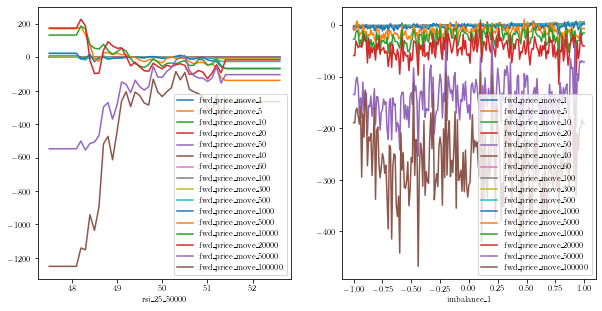

Reading: 2022-06-02


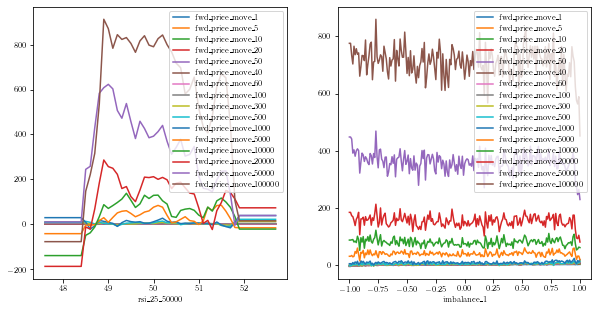

Reading: 2022-06-03


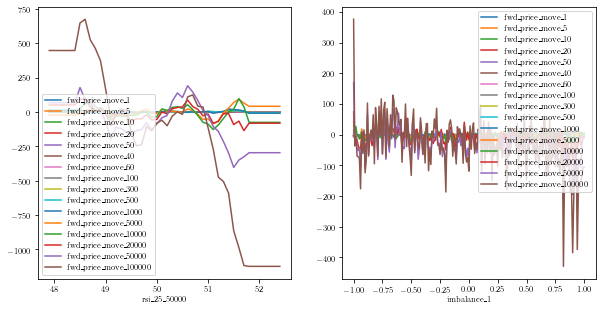

Reading: 2022-06-06


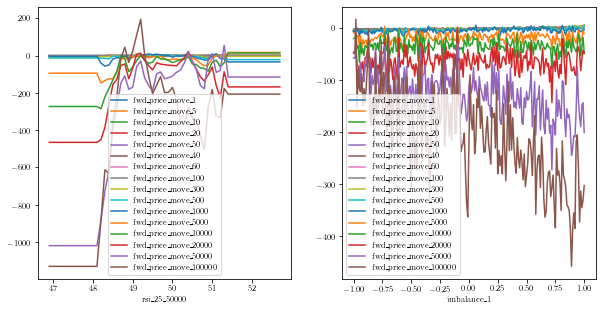

Reading: 2022-06-07


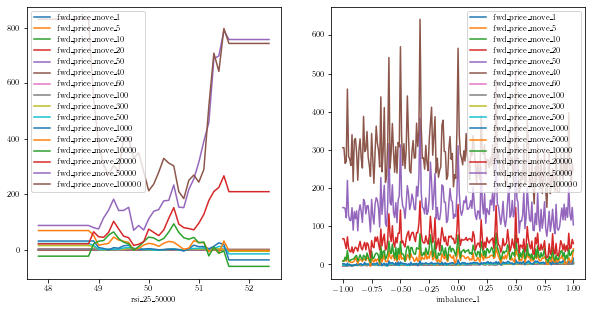

Reading: 2022-06-08


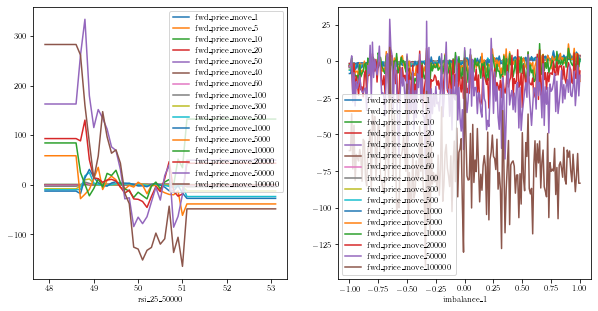

Reading: 2022-06-09


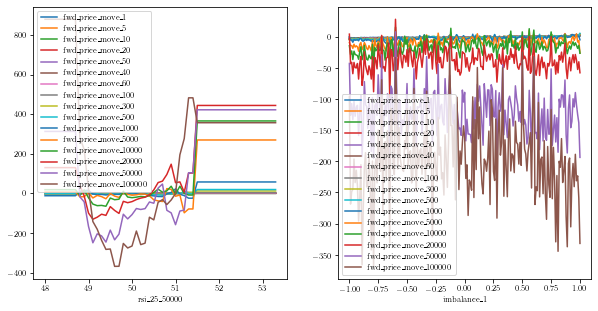

Reading: 2022-06-10


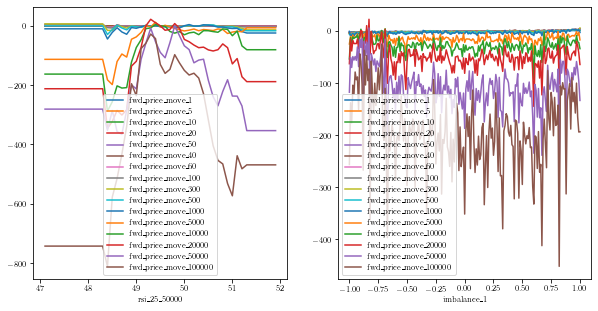

Reading: 2022-06-13


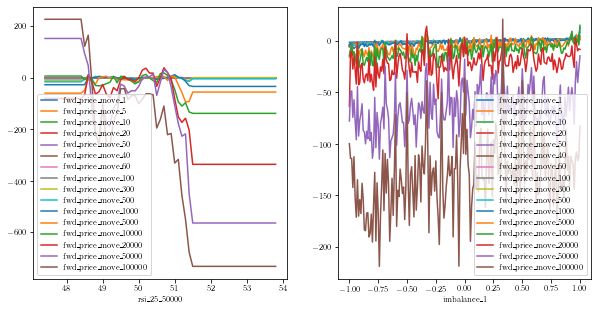

Reading: 2022-06-14


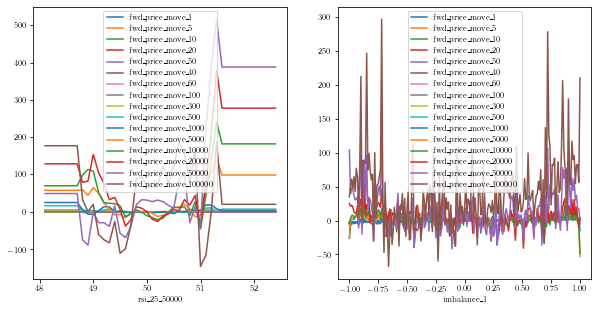

Reading: 2022-06-16


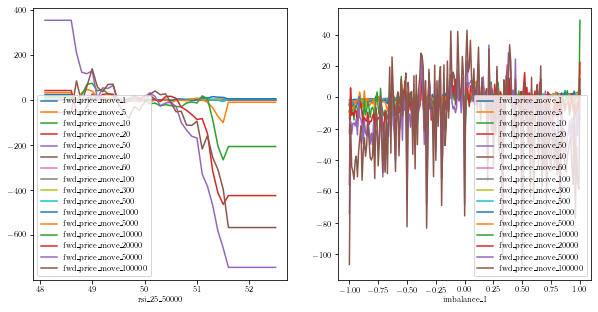

Reading: 2022-06-17


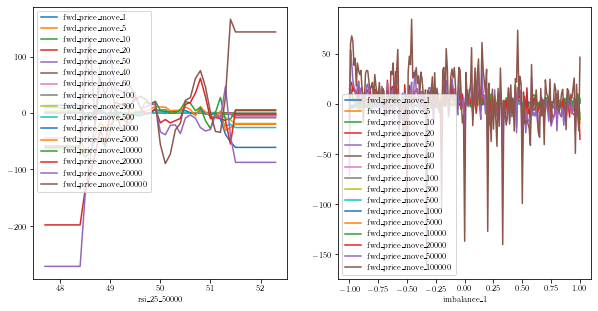

Reading: 2022-06-21


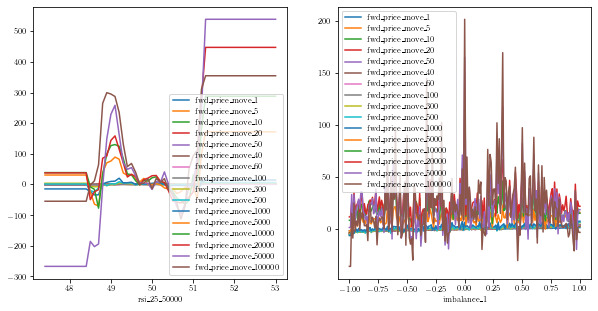

Reading: 2022-06-22


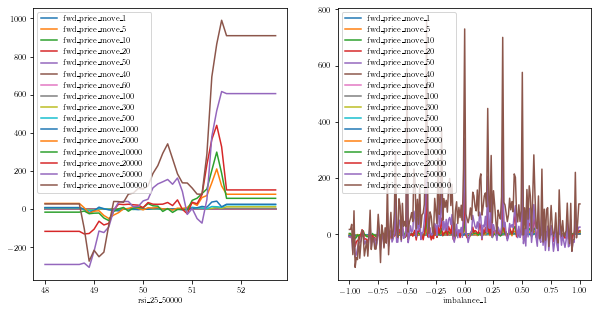

Reading: 2022-06-23


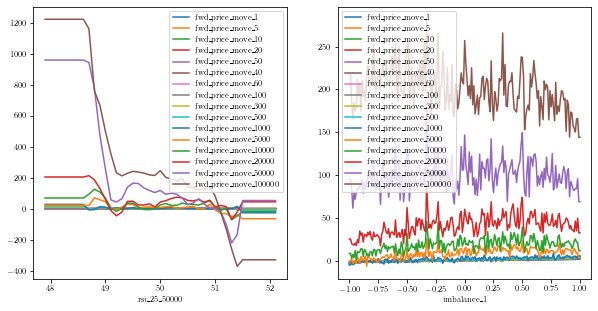

Reading: 2022-06-24


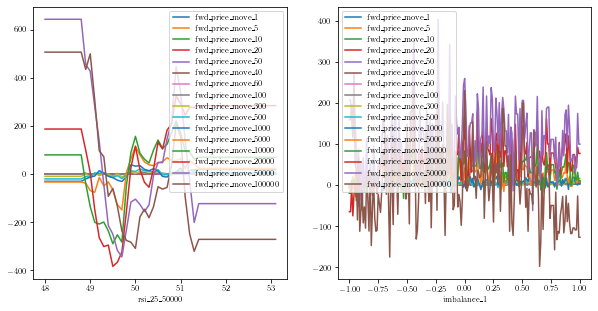

Reading: 2022-06-27


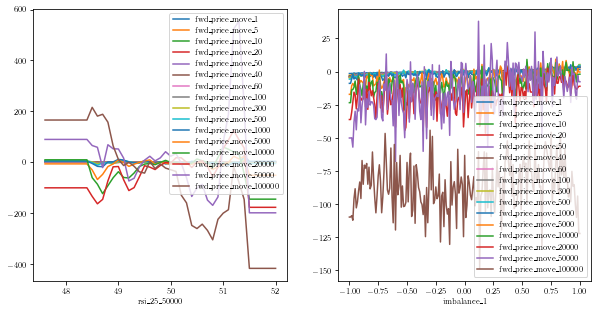

Reading: 2022-06-28


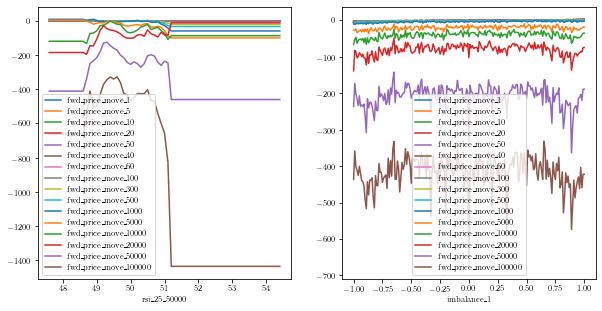

Reading: 2022-06-29


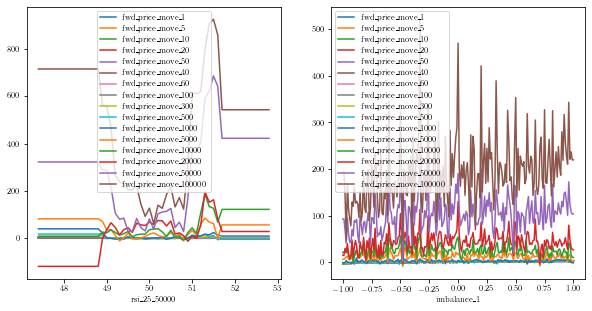

Reading: 2022-06-30


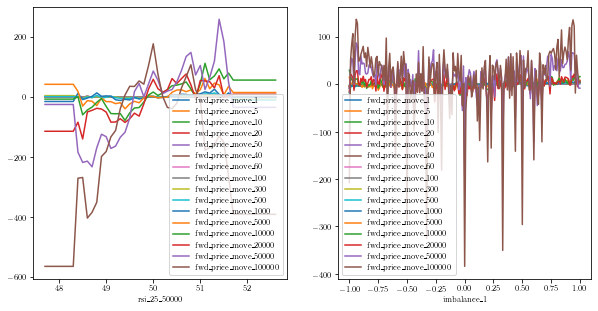

In [51]:
dic_results = {}

data_path     = "/data/Market"
asset_name    = "MSFT"
tick_size     = 0.001

feature_1_name= 'rsi_25_50000'
feature_2_name= 'imbalance_1'

for trade_date_day in ('01', '02', '03', '06', '07', '08', '09', '10', '13', '14', '16', '17', '21', '22', '23', '24', '27', '28', '29', '30'):
# ('02', '03', '04', '05', '08', '09', '10', '11', '12', '15', '16', '17', '18', '19', '22', '23', '24', '25', '26', '29', '30'):
    
    trade_date    = f'2022-06-{trade_date_day}' 
    print('Reading:',trade_date)
    try:
        LOB_features = pd.read_pickle(f'../data/Features/LOB_features_{trade_date}.pkl')
    except Exception as e:
        LOB_data, LOB_messages     = get_LOB_data(f'{os.getcwd()}/../{data_path}', asset_name, trade_date)
        LOB_features  = get_LOB_features(LOB_data,
                                         trade_date = trade_date,
                                         LOB_msg    = LOB_messages)
        LOB_features.to_pickle(f'../data/Features/LOB_features_{trade_date}.pkl')
    
    LOB_features[f'rsi_25_50000'] = rsi(LOB_features.mid_price, 20000, 1)
    
    LOB_features[feature_1_name] = LOB_features[feature_1_name].round(1)
    LOB_features[feature_2_name] = LOB_features[feature_2_name].round(2)
    
    LOB_features_predictive = LOB_features[[feature_1_name, feature_2_name] + fwd_cols].dropna()
    
    predictive_feature = feature_1_name
    counts1 = (LOB_features_predictive[[predictive_feature] + fwd_cols].groupby(predictive_feature).count())
    avgs1   = (LOB_features_predictive[[predictive_feature] + fwd_cols].groupby(predictive_feature).mean()/tick_size)
    avgs1[counts1<5000]=np.nan
    avgs1 = avgs1.sort_index().fillna(method='ffill').fillna(method='bfill')
    
    predictive_feature = feature_2_name
    counts2 = (LOB_features_predictive[[predictive_feature] + fwd_cols].groupby(predictive_feature).count())
    avgs2   = (LOB_features_predictive[[predictive_feature] + fwd_cols].groupby(predictive_feature).mean()/tick_size)
    avgs2[counts2<1000]=np.nan
    avgs2 = avgs2.sort_index().fillna(method='ffill').fillna(method='bfill')
    
    dic_results[trade_date_day] = (counts1, avgs1, counts2, avgs2)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    avgs1.plot(ax=ax1)
    avgs2.plot(ax=ax2)
    plt.show()
    

In [52]:
avgs1 = pd.concat((pd.concat((dic_results[s][1][colname] for s in dic_results.keys()), axis=1).dropna().mean(axis=1).rolling(5).mean() for colname in fwd_cols), axis=1)
avgs2 = pd.concat((pd.concat((dic_results[s][3][colname] for s in dic_results.keys()), axis=1).dropna().mean(axis=1).rolling(3).mean() for colname in fwd_cols), axis=1)


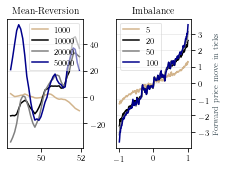

In [54]:
rescale_plot(3.2)

fig = plt.figure()
gs = gridspec.GridSpec(nrows=1, ncols=2)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

#trend
ax1.plot(avgs1.iloc[:,-6], color='tan')
ax1.plot(avgs1.iloc[:,-4], color='k')
ax1.plot(avgs1.iloc[:,-3], color='grey')
ax1.plot(avgs1.iloc[:,-2], color='darkblue')

ax2.plot(avgs2.iloc[:,0], color='tan')
ax2.plot(avgs2.iloc[:,1], color='k')
ax2.plot(avgs2.iloc[:,2], color='grey')
ax2.plot(avgs2.iloc[:,3], color='darkblue')

for ax in (ax1,ax2):
    ax.yaxis.tick_right()
    # ax.tick_params(axis='both', **config_ticks)
    ax.yaxis.set_label_position("right")
    ax.yaxis.label.set_color(colors['grey'])
    ax.grid(axis='y', color='gainsboro', linestyle='-', linewidth=0.5)
    ax.set_axisbelow(True)
    
#  after 
ax2.legend([f'{s}' for s in (5, 20, 50, 100)], loc='upper left', fancybox=True, framealpha=0.5)
ax1.legend([f'{s}' for s in (1000, 10000, 20000, 50000)], loc='upper right', fancybox=True, framealpha=0.5)

# ax1.set_xlim(45,55)
ax2.set_ylabel('Forward price move in ticks')

ax1.set_title('Mean-Reversion')
ax2.set_title('Imbalance')

plt.tight_layout()
plt.savefig('NUM2.pdf', bbox_inches='tight')


In [320]:
avgs1.fillna(method='bfill').to_pickle('rsi_model.pkl')
avgs2.fillna(method='bfill').to_pickle('imb_model.pkl')

In [ ]:
# # rolling averaged predicted movement
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True)

# predictive_feature = 'imbalance_1_rounded'
# rolling_predictive_power = LOB_features_predictive[[predictive_feature, 'Avg_price_move_60']]
# reindex_features = LOB_features.loc[rolling_predictive_power.index]
# # rolling_predictive_power.index = .timestamp
# rolling_predictive_power = pd.concat( (rolling_predictive_power.iloc[-i:-i+3000].groupby(predictive_feature).mean().T/tick_size for i in range(3001,len(rolling_predictive_power),1000)), axis=0)
# rolling_predictive_power.index = (reindex_features.timestamp.values[-i+3000] for i in range(3001,len(LOB_features_predictive),1000))
# rolling_predictive_power[::-1].loc[:,np.sort(LOB_features_predictive[predictive_feature].unique())].loc[:, -1:-0.75].fillna(method='ffill').mean(axis=1).plot(color='k', ax=ax1)

# predictive_feature = 'price_trend_2_rounded'
# rolling_predictive_power = LOB_features_predictive[[predictive_feature, 'Avg_price_move_60']]
# reindex_features = LOB_features.loc[rolling_predictive_power.index]
# # rolling_predictive_power.index = .timestamp
# rolling_predictive_power = pd.concat( (rolling_predictive_power.iloc[-i:-i+3000].groupby(predictive_feature).mean().T/tick_size for i in range(3001,len(rolling_predictive_power),1000)), axis=0)
# rolling_predictive_power.index = (reindex_features.timestamp.values[-i+3000] for i in range(3001,len(LOB_features_predictive),1000))
# rolling_predictive_power[::-1].loc[:,np.sort(LOB_features_predictive[predictive_feature].unique())].loc[:, -0.004:-0.002].fillna(method='ffill').mean(axis=1).plot(color='k', ax=ax2)

# Evidence of non stationarity

In [ ]:
trade_date    = '2014-09-02'
tick_size     = 0.001
LOB_data      = get_LOB_data(f'{os.getcwd()}/{data_path}' , asset_name, trade_date)
LOB_features  = get_features(LOB_data,
                             trade_date = trade_date,
                             trend      = ({'w' : 50},),
                             vol        = (),
                             depth      = {'w' : 500})
LOB_features_predictive = LOB_features[['imbalance_1_rounded',
                                        'imbalance_2_rounded',
                                        "trend_0_rounded",'fwd_price_move_5', 'fwd_price_move_10', 
                                        'fwd_price_move_20', 'fwd_price_move_50', 'fwd_price_move_100']].dropna()

In [ ]:
fwd_cols             = ['fwd_price_move_5', 'fwd_price_move_20', 'fwd_price_move_50', 'fwd_price_move_100']
predictive_feature_1 = 'imbalance_1_rounded'
predictive_feature_2 = 'imbalance_2_rounded'
fwd_window           = 'fwd_price_move_50'

df_predictive_power  = LOB_features_predictive[[fwd_window, predictive_feature_1, predictive_feature_2]]
df_predictive_power[fwd_window] = df_predictive_power[fwd_window]/tick_size

In [ ]:
avgs1_ = avgs1.reindex(avgs1.index.union(df_predictive_power[predictive_feature_1].unique())).sort_index().fillna(method='ffill').fillna(method='bfill')
avgs2_ = avgs2.reindex(avgs2.index.union(df_predictive_power[predictive_feature_2].unique())).sort_index().fillna(method='ffill').fillna(method='bfill')

avgs1_     = avgs1_[fwd_window]
avgs2_     = avgs2_[fwd_window]

In [ ]:
# avgs1

In [ ]:
rolling_w            = 5000
lastwindow           = '4h'

# df_predictive_power[predictive_feature_1] = df_predictive_power[predictive_feature_1].round(4)
# df_predictive_power[predictive_feature_1] = df_predictive_power[predictive_feature_1].round(2)

df_predictive_power['predictive_move_feature_1'] = avgs1_.loc[df_predictive_power[predictive_feature_1]].values
df_predictive_power['predictive_move_feature_2'] = avgs2_.loc[df_predictive_power[predictive_feature_2]].values

print(LOB_features.timestamp.diff(rolling_w).mean()/np.timedelta64(1,"s"))

df_predictive_power['MAE_feature_1'] = ((df_predictive_power[fwd_window] - \
                                        df_predictive_power["predictive_move_feature_1"]).abs()
                                       ).rolling(rolling_w, min_periods=rolling_w).mean()

df_predictive_power['MAE_feature_2'] = ((df_predictive_power[fwd_window] - \
                                        df_predictive_power["predictive_move_feature_2"]).abs()
                                       ).rolling(rolling_w, min_periods=rolling_w).mean()

# df_predictive_power = df_predictive_power.iloc[0:len(df_predictive_power):rolling_w]

best_dynamics_feature = df_predictive_power[['MAE_feature_1', 'MAE_feature_2']].idxmin(axis=1).dropna()

best_dynamics_feature[ best_dynamics_feature== 'MAE_feature_1'] = 1
best_dynamics_feature[ best_dynamics_feature== 'MAE_feature_2'] = 2

print(len(np.diff(best_dynamics_feature.diff(1)[best_dynamics_feature.diff(1)!=0])))
print(np.mean(np.diff(best_dynamics_feature.diff(1)[best_dynamics_feature.diff(1)!=0].index.values)))

fig, (ax1, ax2) = plt.subplots(1, 2)

pd.concat((LOB_features.loc[best_dynamics_feature.index].timestamp, 
           best_dynamics_feature), axis=1
         ).set_index('timestamp').first(lastwindow).plot(ax=ax1)

pd.concat((LOB_features.loc[best_dynamics_feature.index].timestamp, best_dynamics_feature
          ), axis=1).set_index('timestamp').last(lastwindow).plot(ax=ax2)

In [ ]:
# w = 1000000

df_to_plot = pd.concat((LOB_features.loc[df_predictive_power.index].timestamp, 
                        df_predictive_power), axis=1)
# plt.plot(LOB_features.loc[df_predictive_power.iloc[:w].index].timestamp.values,
#           df_predictive_power[['MAE_feature_1']].iloc[:w].values, color='k')
# plt.plot(LOB_features.loc[df_predictive_power.iloc[:w].index].timestamp.values,
#           df_predictive_power[['MAE_feature_2']].iloc[:w].values, color='blue')
# df_to_plot.set_index('timestamp').last('8h')[['MAE_feature_1', 'MAE_feature_2']].plot()
df_to_plot.reset_index().iloc[-200000:][['MAE_feature_1', 'MAE_feature_2']].plot()


In [ ]:
LOB_features.loc[df_predictive_power.iloc[-w:].index].timestamp.values

In [ ]:
cols = rolling_predictive_power.Avg_price_move_60.unique()